In [1]:
import pandas as pd
import warnings
#warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)
iris_original = pd.read_csv('Iris.csv')
iris = iris_original.copy()
iris = iris.drop('Id', axis=1)
import numpy as np

In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [3]:
iris.shape

(150, 5)

In [4]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Univariate Plots

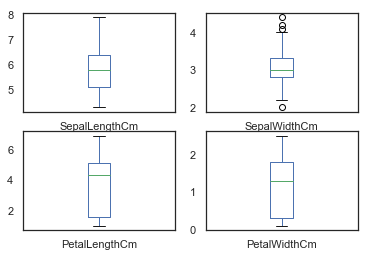

In [9]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

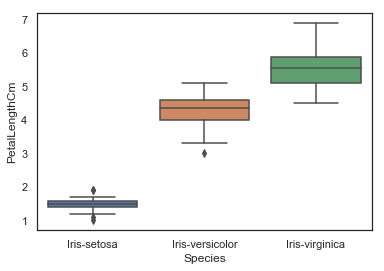

In [10]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

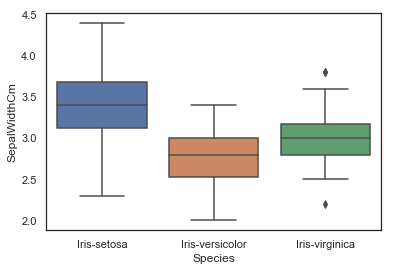

In [11]:
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)

## Outlier detected...let's play with them :P

c:\users\schin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Outlier data points replaced by median values


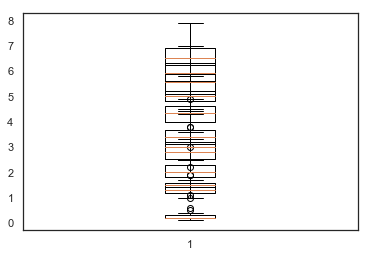

In [12]:
iris_class =  ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
for i in range(0,4) :
    for j in range(0,3) : 
        #print("***Boxplot for " + iris.columns.values[i] + " and " + iris_class[j])
        data = iris[iris.columns.values[i]][iris.Species == iris_class[j]]
        #print("Median : ", np.median(data))
        boxfox = plt.boxplot(data, showfliers=True)
        #print('Whiskers: ', [item.get_ydata()[1] for item in boxfox['whiskers']])
        x = [item.get_ydata() for item in boxfox['fliers']]
        #print('Outliers: ', x[0])
        if len(x[0] > 0) :
            #print(x[0])
            for k in range(0, len(x[0])) : 
                #print("ol for " , data)
                #print("outliers ",  x[0][k])
                data.replace(x[0][k], np.median(data),inplace=True)
                #print("bla", data)
                iris[iris.columns.values[i]][iris.Species == iris_class[j]] = data
        #plt.pause(0.05)
#iris.SepalWidthCm[iris.Species == 'Iris-virginica']
print('Outlier data points replaced by median values')

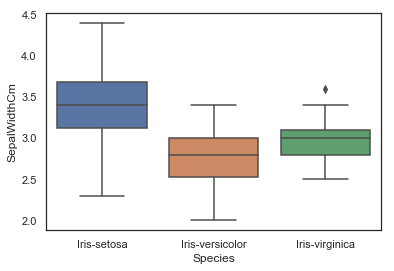

In [13]:
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)

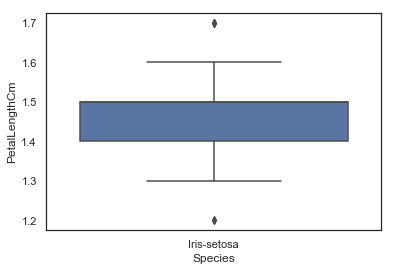

In [14]:
df = sns.boxplot(x=iris.Species[iris.Species=="Iris-setosa"], y = "PetalLengthCm", data=iris)

# Univariate Plots Continued

In [ ]:
# We can also plot these below graphs by using above for loop in single run

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


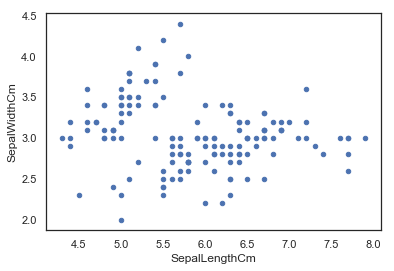

In [15]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm') #pandas method

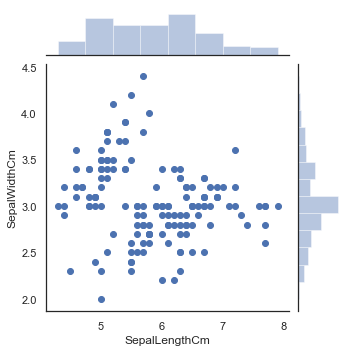

In [17]:
# jointplot of seaborn = bivariate scatterplot + univariate histogram
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, size=5)

c:\users\schin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


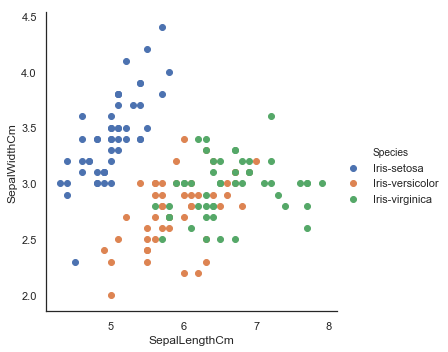

In [18]:
#Facetgrid is used to color the scatterplot by species
sns.FacetGrid(iris, hue='Species', size=5).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

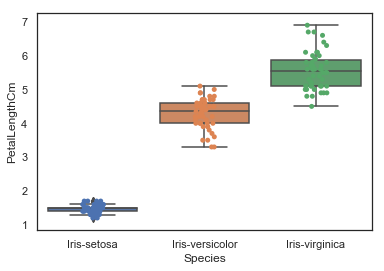

In [19]:
ax = sns.boxplot(x='Species', y='PetalLengthCm', data=iris)
ax = sns.stripplot(x='Species', y='PetalLengthCm', data=iris, jitter=True, edgecolor='gray')

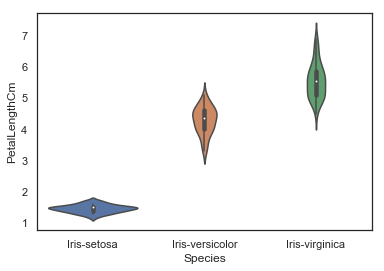

In [20]:
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)

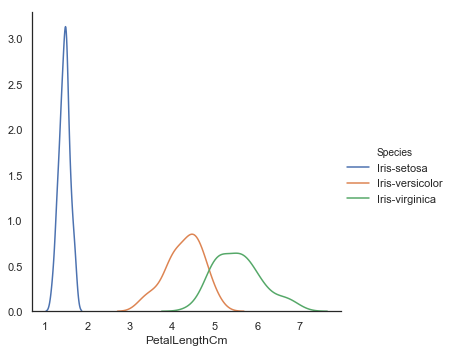

In [21]:
sns.FacetGrid(iris, hue='Species', size=5).map(sns.kdeplot, 'PetalLengthCm').add_legend()

c:\users\schin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


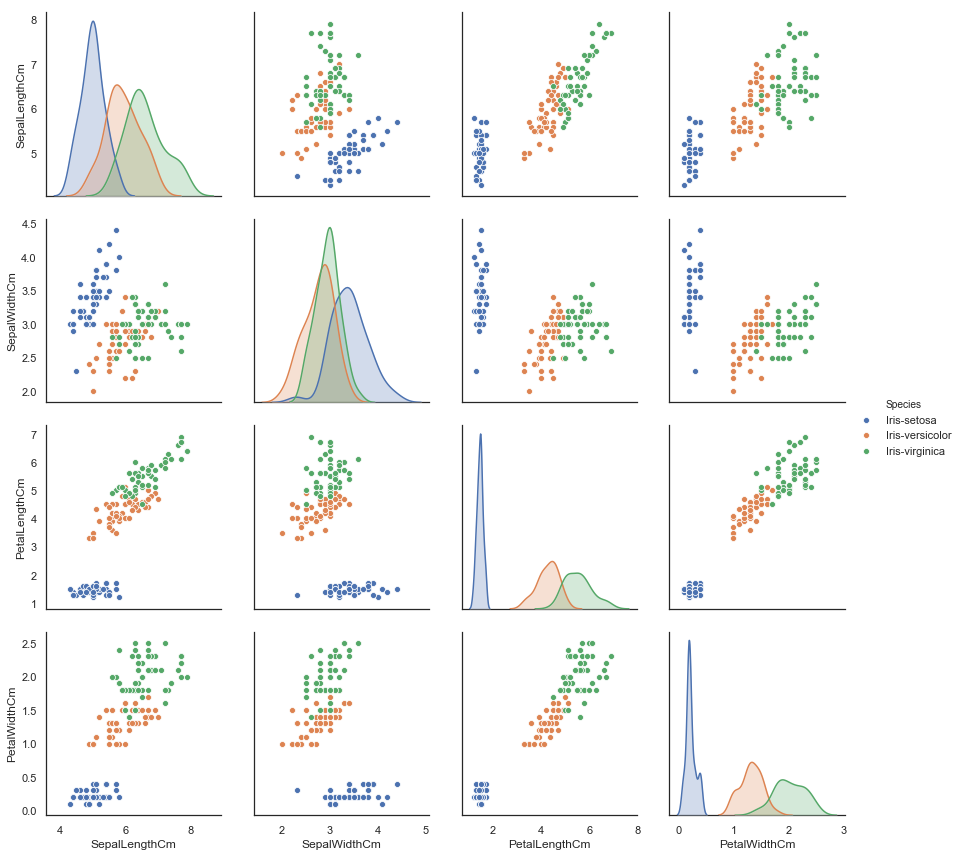

In [22]:
sns.pairplot(iris, hue='Species', size=3)

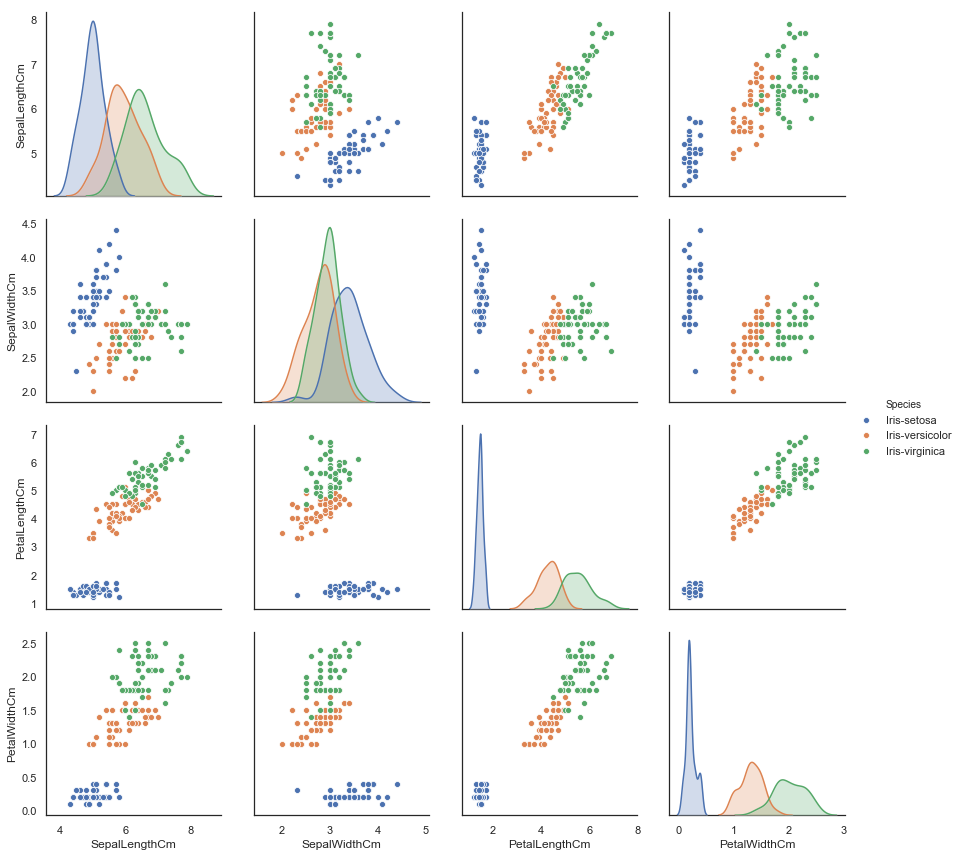

In [23]:
sns.pairplot(iris, hue='Species', size=3,diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11791150>,
      dtype=object)

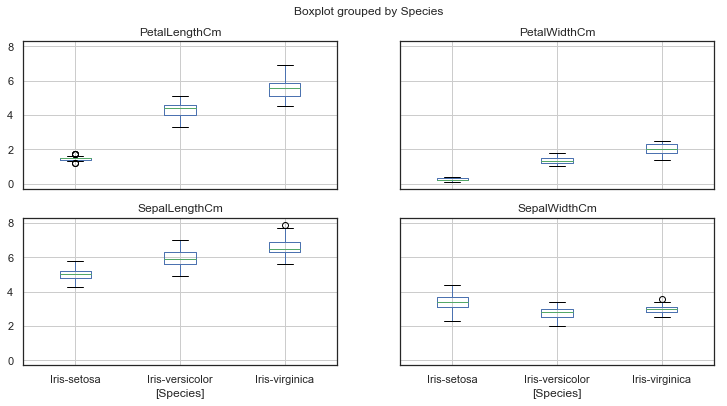

In [24]:
iris.boxplot(by='Species', figsize=(12,6))

In [ ]:
# From the above data visualization and analysis, we can say that PetalLengthCm 
# is the main deciding factor in predicting the iris flower type.

### Splitting data into train and test

In [26]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, 4]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
print(X_train, X_test, y_train, y_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
61             5.9           3.0            4.2           1.5
92             5.8           2.6            4.0           1.2
112            6.8           3.0            5.5           2.1
2              4.7           3.2            1.3           0.2
141            6.9           3.1            5.1           2.3
43             5.0           3.5            1.6           0.2
10             5.4           3.7            1.5           0.2
60             5.0           2.0            3.5           1.0
116            6.5           3.0            5.5           1.8
144            6.7           3.3            5.7           2.5
119            6.0           3.0            5.0           1.5
108            6.7           2.5            5.8           1.8
69             5.6           2.5            3.9           1.1
135            7.7           3.0            6.1           2.3
56             6.3           3.3            4.7           1.6
80      

# Now we aready after data cleaning...we can apply machine learning algorithms

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
logReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0)
logReg = logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [32]:
accuracy_score(y_test, y_pred)

0.9736842105263158

#### ROC curves are typically used in binary classification to study the output of a classifier. 
#### In order to extend ROC curve and ROC area to multi-class or multi-label classification, 
#### it is necessary to binarize the output. One ROC curve can be drawn per label, 
#### but one can also draw a ROC curve by considering each element of the label indicator matrix 
#### as a binary prediction (micro-averaging).

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree = DecisionTreeClassifier(random_state=0)

In [35]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [36]:
y_pred_DT = dtree.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred_DT)

0.9473684210526315

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rforest = RandomForestClassifier(random_state=0, oob_score=True)

In [40]:
rforest.fit(X_train, y_train)

c:\users\schin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\schin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\schin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [41]:
y_pred_rf = rforest.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred_rf)

0.9473684210526315

In [43]:
rforest.oob_score_

0.9464285714285714

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_knn)